Derek Lamb

DSC640 

Week 7 & 8 Assignment

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Load the datasets
powerball_path = '/Users/dereklamb/Downloads/Lottery_Powerball_Winning_Numbers__Beginning_2010_20240421.csv'
mega_millions_path = '/Users/dereklamb/Downloads/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002_20240421.csv'
pick_10_path = '/Users/dereklamb/Downloads/Lottery_Pick_10_Winning_Numbers__Beginning_1987_20240421.csv'

powerball_data = pd.read_csv(powerball_path)
mega_millions_data = pd.read_csv(mega_millions_path)
pick_10_data = pd.read_csv(pick_10_path)

# Function to preprocess datasets
def preprocess_lottery_data(df, game_name):
    df['Draw Date'] = pd.to_datetime(df['Draw Date'])  # Convert Draw Date to datetime format
    df['Game'] = game_name  # Add a column for the game name
    # Split Winning Numbers into separate columns
    max_numbers = df['Winning Numbers'].str.split().map(len).max()
    number_cols = [f"Number_{i+1}" for i in range(max_numbers)]
    numbers_split = df['Winning Numbers'].str.split(expand=True)
    numbers_split.columns = number_cols[:numbers_split.shape[1]]
    return pd.concat([df[['Draw Date', 'Game']], numbers_split], axis=1)

# Preprocess all datasets
powerball_processed = preprocess_lottery_data(powerball_data, 'Powerball')
mega_millions_processed = preprocess_lottery_data(mega_millions_data, 'Mega Millions')
pick_10_processed = preprocess_lottery_data(pick_10_data, 'Pick 10')

# Combine the datasets for unified analysis
all_lottery_data = pd.concat([powerball_processed, mega_millions_processed, pick_10_processed], ignore_index=True)

## Convert number columns to numeric for analysis
number_columns = ['Number_1', 'Number_2', 'Number_3', 'Number_4', 'Number_5', 'Number_6']
for col in number_columns:
    all_lottery_data[col] = pd.to_numeric(all_lottery_data[col], errors='coerce')

# Combine numbers 1-6 into a single column for density calculation
melted_data = pd.melt(all_lottery_data, id_vars=['Draw Date', 'Game'], value_vars=number_columns, 
                      var_name='Number_Position', value_name='Number').dropna()

# Calculate the density using Gaussian KDE
all_numbers = melted_data['Number']
density = gaussian_kde(all_numbers)
x_vals = np.linspace(all_numbers.min(), all_numbers.max(), 1000)
density_vals = density(x_vals)

# Map the density values to the dataset
density_mapping = pd.DataFrame({'Number': x_vals, 'Density': density_vals})
melted_data = pd.merge(melted_data, density_mapping, on='Number', how='left')

# Pivot back to original format with density for numbers 1-6
density_pivot = melted_data.pivot(index=['Draw Date', 'Game'], columns='Number_Position', values='Density')
density_pivot.columns = [f"Density_{col}" for col in density_pivot.columns]

# Merge density columns back with the original data
final_data = pd.merge(all_lottery_data, density_pivot, on=['Draw Date', 'Game'], how='left')



In [75]:
# Function to preprocess datasets
def preprocess_lottery_data(df, game_name):
    df['Draw Date'] = pd.to_datetime(df['Draw Date'])  # Convert Draw Date to datetime format
    df['Game'] = game_name  # Add a column for the game name
    # Split Winning Numbers into separate columns
    max_numbers = df['Winning Numbers'].str.split().map(len).max()
    number_cols = [f"Number_{i+1}" for i in range(max_numbers)]
    numbers_split = df['Winning Numbers'].str.split(expand=True)
    numbers_split.columns = number_cols[:numbers_split.shape[1]]
    return pd.concat([df[['Draw Date', 'Game']], numbers_split], axis=1)

# Preprocess all datasets
powerball_processed = preprocess_lottery_data(powerball_data, 'Powerball')
mega_millions_processed = preprocess_lottery_data(mega_millions_data, 'Mega Millions')
pick_10_processed = preprocess_lottery_data(pick_10_data, 'Pick 10')

# Combine the datasets for unified analysis
all_lottery_data = pd.concat([powerball_processed, mega_millions_processed, pick_10_processed], ignore_index=True)

# Convert number columns to numeric for analysis
for col in all_lottery_data.columns[2:]:
    all_lottery_data[col] = pd.to_numeric(all_lottery_data[col], errors='coerce')

# Save the processed data to a new CSV file
output_path = '/Users/dereklamb/Downloads/processed_lottery_data_2.csv'
all_lottery_data.to_csv(output_path, index=False)
print(f"Processed data has been saved to {output_path}")


Processed data has been saved to /Users/dereklamb/Downloads/processed_lottery_data_2.csv


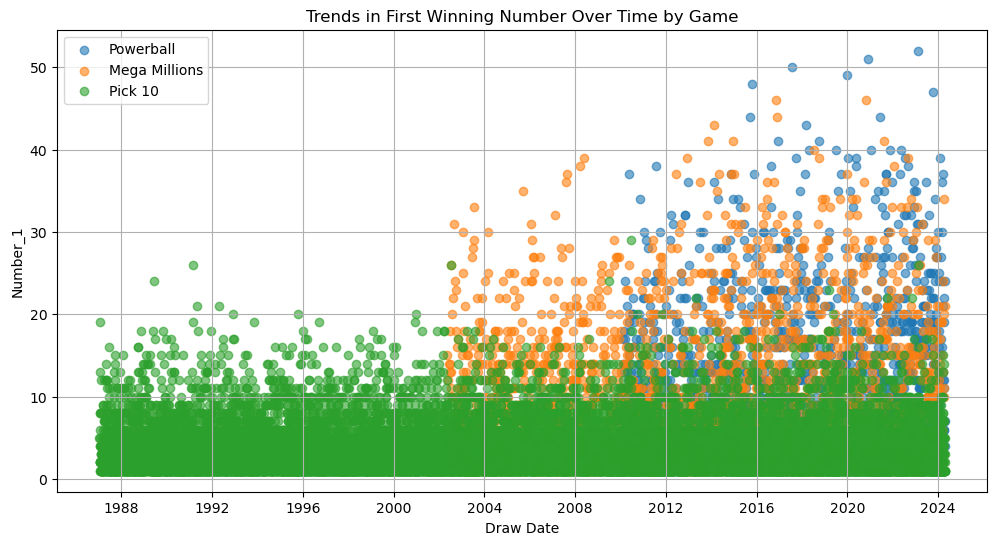

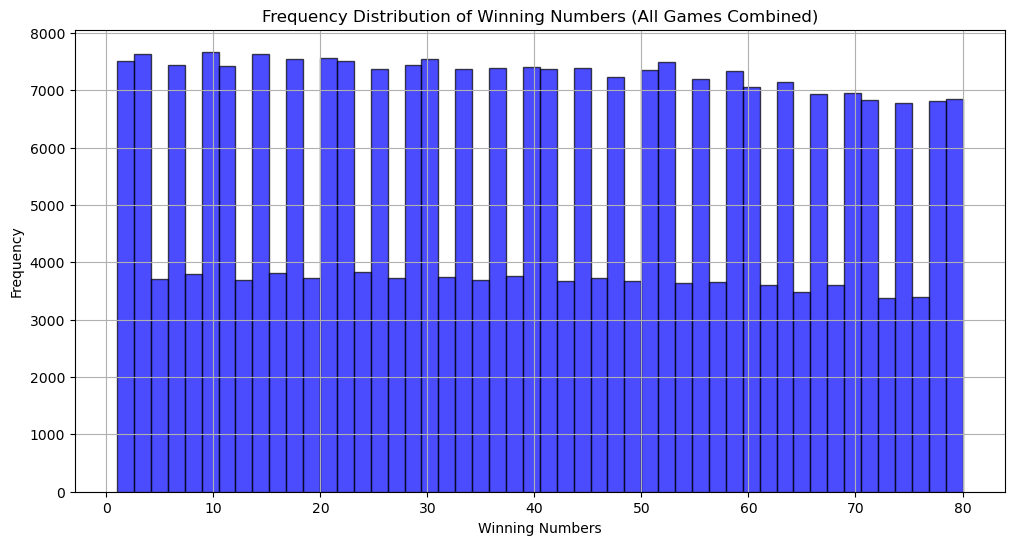

In [76]:
# Scatterplot: Trends in Number_1 over time by game
plt.figure(figsize=(12, 6))
for game in all_lottery_data['Game'].unique():
    game_data = all_lottery_data[all_lottery_data['Game'] == game]
    plt.scatter(game_data['Draw Date'], game_data['Number_1'], label=game, alpha=0.6)
plt.title('Trends in First Winning Number Over Time by Game')
plt.xlabel('Draw Date')
plt.ylabel('Number_1')
plt.legend()
plt.grid()
plt.show()

# Histogram: Frequency distribution of numbers for all games combined
plt.figure(figsize=(12, 6))
all_numbers = all_lottery_data.iloc[:, 2:].stack()  # Stack all number columns
plt.hist(all_numbers, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Frequency Distribution of Winning Numbers (All Games Combined)')
plt.xlabel('Winning Numbers')
plt.ylabel('Frequency')
plt.grid()
plt.show()



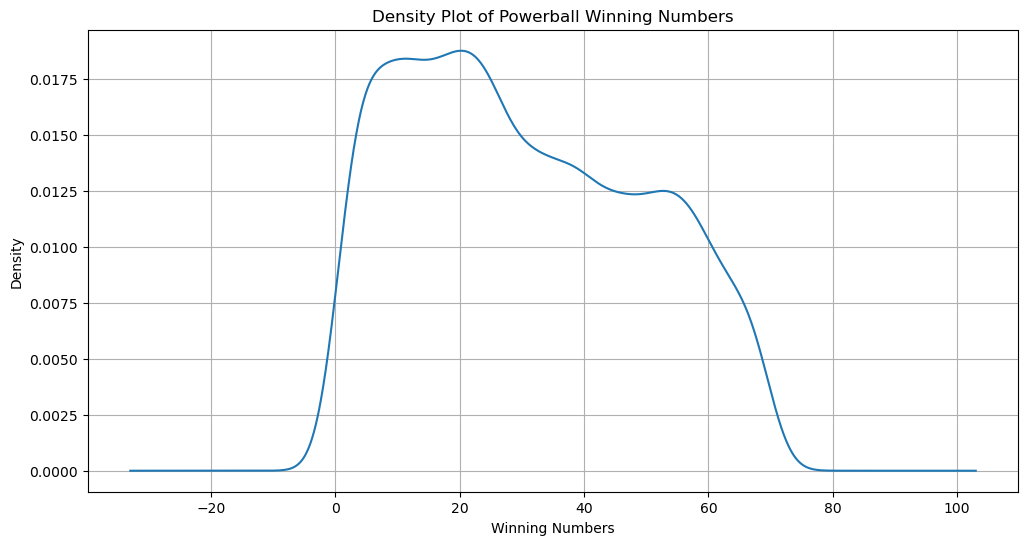

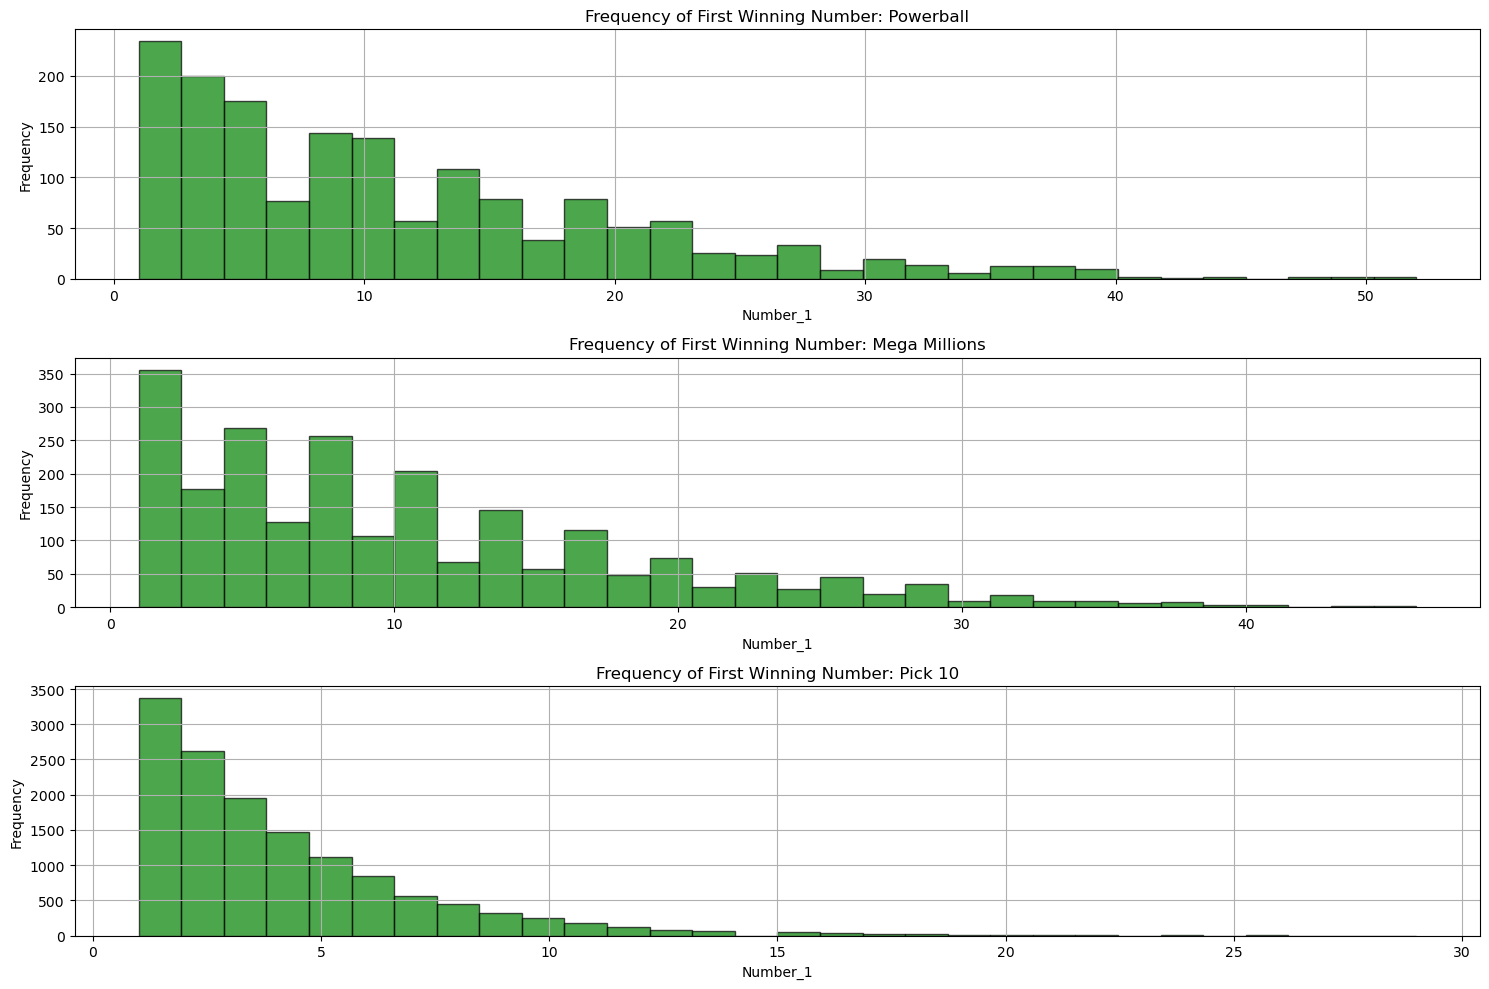

In [77]:
# Density Plot: Density of numbers for Powerball
powerball_numbers = all_lottery_data[all_lottery_data['Game'] == 'Powerball'].iloc[:, 2:].stack()
plt.figure(figsize=(12, 6))
powerball_numbers.plot(kind='kde', title='Density Plot of Powerball Winning Numbers')
plt.xlabel('Winning Numbers')
plt.grid()
plt.show()

# Small Multiples: Histogram of Number_1 by game
plt.figure(figsize=(15, 10))
games = all_lottery_data['Game'].unique()
for i, game in enumerate(games, 1):
    plt.subplot(3, 1, i)
    game_data = all_lottery_data[all_lottery_data['Game'] == game]['Number_1']
    plt.hist(game_data, bins=30, color='green', alpha=0.7, edgecolor='black')
    plt.title(f'Frequency of First Winning Number: {game}')
    plt.xlabel('Number_1')
    plt.ylabel('Frequency')
    plt.grid()

plt.tight_layout()
plt.show()